<a href="https://colab.research.google.com/github/SudeshnaBora/aand_numerical/blob/master/AAND_Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Name:</b> Sudeshna Bora

<b> Assignment:</b> 02 

<b> Time Taken:</b> 12 hours

In [0]:
#import library
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import math


**Trial-Averaged Firing Rates**

**2(a)**

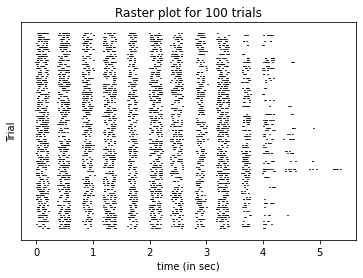

In [2]:
spike_times_array = np.loadtxt('SpikeTimes.dat')

#Transpose the matrix into NXM so that each row represents each trials , this is done for my own comfort
spike_times_records = spike_times_array.T

lineoffset = 1
offset = .0002
for i in range(100):
  x = spike_times_records[i,:]
  x = x[~np.isnan(x)]
  plt.eventplot(x*10**-3, colors='black', lineoffsets=lineoffset,linelengths=0.0001)
  lineoffset = lineoffset+offset
plt.yticks([])
plt.title('Raster plot for 100 trials')
plt.xlabel('time (in sec)')
plt.ylabel('Trial')
plt.show()


**2(b)**

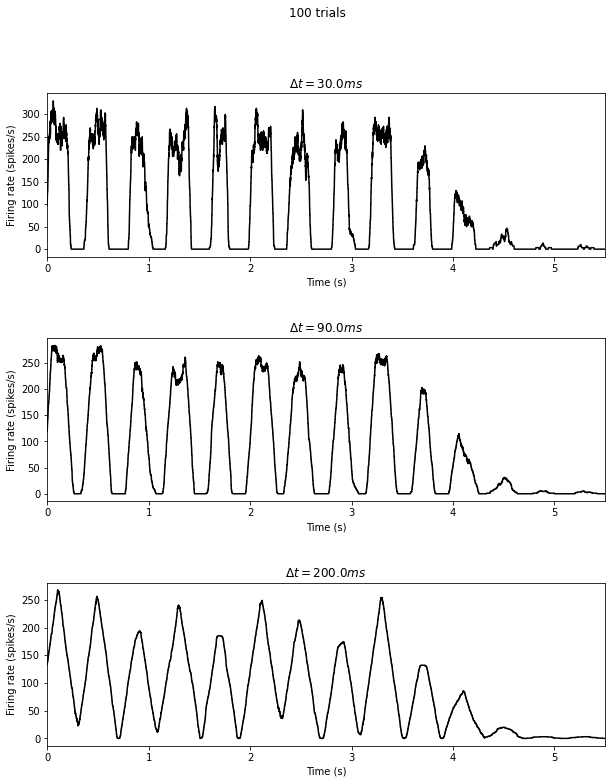

In [3]:
def trial_average_firing_rate(spike_train, dt, duration:float,super_title, function):
  '''
  Calculates and plots the trial averafe firing rate

  Parameters :
  spike_train : Gives the time index of the spikes
  dt : width
  duration : The duration of the trial
  super_title : The title of the plot
  function : The function used to calculate the firing rate

  Returns:

  Plots the firing rate (spikes/sec)
  '''
  t = np.arange(0, duration, 0.0001)
  fig, axs = plt.subplots(3, figsize=(10,12))
  plt.subplots_adjust(hspace = 0.5)

  for i in range(len(dt)):
    window = function(dt[i])
    rates = np.convolve(spike_train, window, mode = 'same') 
    axs[i].plot(t, rates[0 : int(duration * 10000)]*10, 'k')
    axs[i].set(title =  f'$\Delta t = {dt[i]*1000} ms$', xlabel = 'Time (s)', ylabel = 'Firing rate (spikes/s)', xlim = (0, duration))
  plt.suptitle(super_title)


def rectange_window(width):
  '''
  Rectangle function for convolution

  Parameters:
  width: The width of the rectangle window

  Returns:
  The window 
  '''
  rct = (1/width) * np.ones(int(width*10000))
  return rct

widths = np.array([30, 90, 200])/1000

trial_length = 5.5

#as resolution is 0.1 ms , we will multiply by 10000

spikes = np.zeros((int(trial_length * 10000), 100))

#calculate response function
for i in range(100):
  for element in spike_times_array[:,i] * 10:
    if ~np.isnan(element):
      spikes[int(element), i] = 1

mean_trials= np.mean(spikes, axis=1)

trial_average_firing_rate(mean_trials, dt = widths, duration = trial_length,super_title = '100 trials', function = rectange_window)




**2(c)**

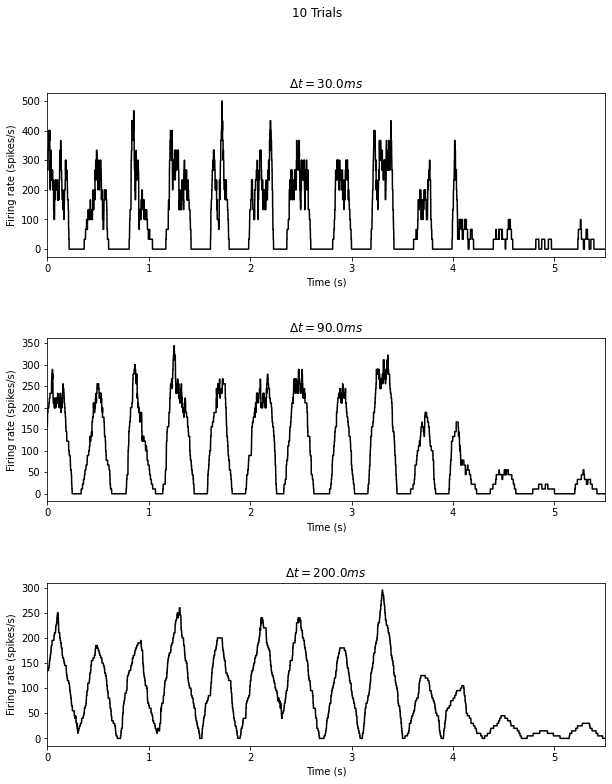

In [4]:
#create indices for different trails 
row_index_10 = np.random.randint(low = 0, high = 100 , size = 10) # row index
row_index_50 = np.random.randint(low = 0, high = 100 , size = 50)

trial_length = 5.5

#as resolution is 0.1 ms , we will multiply by 10000

spikes = np.zeros((int(trial_length * 10000), 10))

#calculate response function
for index,i in enumerate(row_index_10):
  for element in spike_times_array[:,i] * 10:
    if ~np.isnan(element):
      spikes[int(element), index] = 1

mean_trials= np.mean(spikes, axis=1)

trial_average_firing_rate(mean_trials, dt = widths, duration = trial_length,super_title = '10 Trials', function = rectange_window)

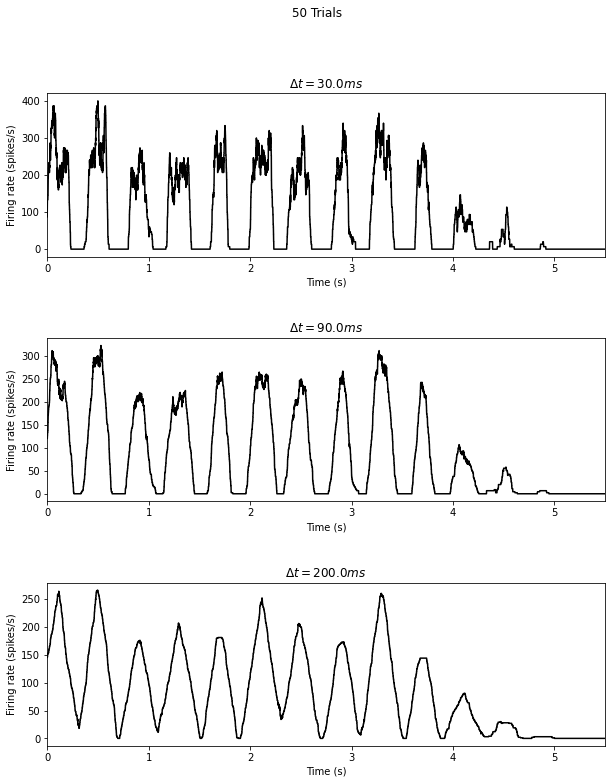

In [5]:
trial_length = 5.5

#as resolution is 0.1 ms , we will multiply by 10000

spikes = np.zeros((int(trial_length * 10000), 50))

#calculate response function
for index,i in enumerate(row_index_50):
  for element in spike_times_array[:,i] * 10:
    if ~np.isnan(element):
      spikes[int(element), index] = 1
mean_trials= np.mean(spikes, axis=1)
trial_average_firing_rate(mean_trials, dt = widths, duration = trial_length,super_title = '50 Trials', function = rectange_window)

By plotting firing rate by considering different trials, we observe the resolution becomes finer as more and more trials are includes (sometimes we can calculate different firing rate - observe graph **II** with $\Delta t = 200 ms $ , the firing rate maxima is around 300 whereas for 100 trials , it is around 250 spikes/sec). 

**Q2 Spike-Triggered Average**

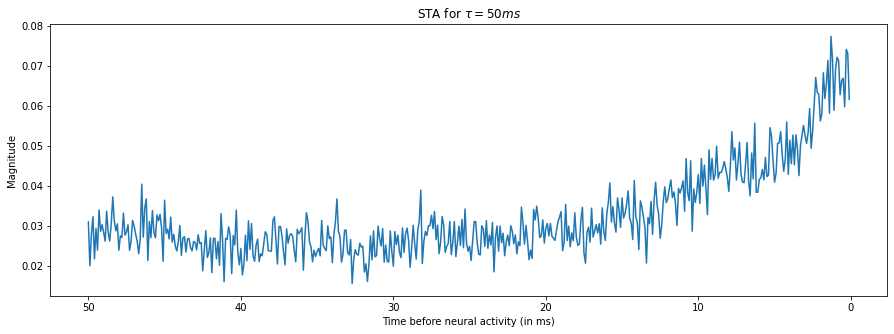

In [6]:
sta_data = sio.loadmat("STA_data.mat")

spike_time_array02 = sta_data['SpikeTimes'] # 744X100, 100 trials with 744 spike time index
stimulus = sta_data['Stimulus'] # 1X10000
trial_length = 1 # in second with resolution 0.1ms
tau = 50 # adjusting resolution
resolution = 0.1
num_timesteps   = int(tau/resolution)

spikes = np.zeros((int(trial_length * 10000), 100))

#make length of stimulus and spike_times same
for i in range(100):
  for element in spike_time_array02[:,i] * 10:
    if ~np.isnan(element):
      spikes[int(element), i] = 1

#create data structure for sta (num_timesteps , 100)
sta_matrix02 = np.zeros((num_timesteps,100))

#loop throw each event (column)
for col in range(100):
  spike_times = spikes[num_timesteps:].nonzero()[0] + num_timesteps
  num_spikes = len(spike_times)
  for spikeIdx in spike_times:
    sta_matrix02[:,col] += stimulus[0,spikeIdx-num_timesteps:spikeIdx]
  sta_matrix02[:,col] /= num_spikes
sta02 = np.mean(sta_matrix02,axis=1)

fig, ax1 = plt.subplots(1, figsize = (15, 5))
ax1.plot(sta02)
ax1.set_xticks([0,100,200,300,400,500])
ax1.set_xticklabels(['50','40','30','20','10','0'])
ax1.set_xlabel('Time before neural activity (in ms)')
ax1.set_title(r'STA for $\tau = 50 ms$')
ax1.set_ylabel('Magnitude')
plt.show()

I think the cross correlation method is efficient as it is over a continous time scale.
